## Imports

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [96]:
plt.style.use('ggplot')

## Read in files

In [97]:
pdf = pd.read_csv('data/Patient_meta.csv')
sdf = pd.read_csv('data/Study_results.csv')


### Rename ID column

In [98]:
sdf.rename(columns={'Mouse ID':'Patient_ID'}, inplace=True)
sdf

,Patient_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


### Merge Datasets 

In [99]:
mdf = pd.merge(pdf, sdf, on='Patient_ID', how='left')
mdf.head()

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,Arlen Marshall,D,Asian,123 Elm ST. Sterling VA 20165,"p: 161-1216, c: 316-3412, fax: 916-5555",0,45.000000,0
1,0,k403,Ramicane,Male,21,16,Arlen Marshall,D,Asian,123 Elm ST. Sterling VA 20165,"p: 161-1216, c: 316-3412, fax: 916-5555",5,38.825898,0
2,0,k403,Ramicane,Male,21,16,Arlen Marshall,D,Asian,123 Elm ST. Sterling VA 20165,"p: 161-1216, c: 316-3412, fax: 916-5555",10,35.014271,1
3,0,k403,Ramicane,Male,21,16,Arlen Marshall,D,Asian,123 Elm ST. Sterling VA 20165,"p: 161-1216, c: 316-3412, fax: 916-5555",15,34.223992,1
4,0,k403,Ramicane,Male,21,16,Arlen Marshall,D,Asian,123 Elm ST. Sterling VA 20165,"p: 161-1216, c: 316-3412, fax: 916-5555",20,32.997729,1


## De-Identification of dataset
### Safe Harbor guidlines (18 HIPAA identifiers)

In [100]:
mdf.Name = '[Name]'
mdf.Address = '[Address]'
mdf.ContactNumbers = '[ContactNumber]'
mdf

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],0,45.000000,0
1,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],5,38.825898,0
2,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],10,35.014271,1
3,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],15,34.223992,1
4,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],20,32.997729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],25,63.145652,2
1889,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],30,65.841013,3
1890,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],35,69.176246,4
1891,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],40,70.314904,4


## Determine number of patients

In [101]:
len(set(mdf['Patient_ID']))

249

## Filter and drop duplicates

### Locate duplicates

In [102]:
filt = mdf.duplicated(subset=['Patient_ID', 'Timepoint'])
filt

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [103]:
df_dup = mdf.loc[filt]
df_dup

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites
909,107,g989,Propriva,Female,21,26,[Name],D,Cauc,[Address],[ContactNumber],0,45.000000,0
911,107,g989,Propriva,Female,21,26,[Name],D,Cauc,[Address],[ContactNumber],5,47.570392,0
913,107,g989,Propriva,Female,21,26,[Name],D,Cauc,[Address],[ContactNumber],10,49.880528,0
915,107,g989,Propriva,Female,21,26,[Name],D,Cauc,[Address],[ContactNumber],15,53.442020,0
917,107,g989,Propriva,Female,21,26,[Name],D,Cauc,[Address],[ContactNumber],20,54.657650,1


### Identify duplicate id's

In [104]:
#pid = patient id, did = duplicate id
pid = df_dup['Patient_ID']
did = set(pid)
did

{'g989'}

### Createing a dataframe excluding duplicate id

In [105]:
clean_df = mdf.loc[~mdf.Patient_ID.isin(did)]
clean_df

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],0,45.000000,0
1,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],5,38.825898,0
2,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],10,35.014271,1
3,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],15,34.223992,1
4,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],20,32.997729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],25,63.145652,2
1889,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],30,65.841013,3
1890,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],35,69.176246,4
1891,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],40,70.314904,4


### Confirm patient clean count

In [106]:
count = len(set(clean_df['Patient_ID']))
count

248

## Data Visualiztion

### group patient id by drug regimen

In [107]:
#Bar plot data
df = clean_df['Patient_ID'].groupby(by=clean_df['DrugRegimen'], as_index=True).count()
df

DrugRegimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Patient_ID, dtype: int64

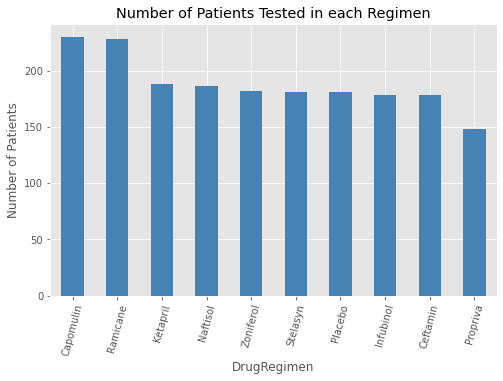

In [108]:
df.sort_values(axis=0, inplace=True, ascending=False)
df.plot(kind="bar", figsize=(8,5), legend=False, color='steelblue')
#formatting
plt.title('Number of Patients Tested in each Regimen')
plt.ylabel('Number of Patients')
plt.xticks(rotation=75)
df_regimentests=df

In [109]:
#line graph data
df = clean_df.loc[clean_df.Patient_ID == 'z969']
df

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites
1883,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],0,45.000000,0
1884,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],5,49.332999,0
1885,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],10,52.656081,1
1886,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],15,54.713005,2
1887,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],20,57.898778,2
1888,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],25,63.145652,2
1889,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],30,65.841013,3
1890,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],35,69.176246,4
1891,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],40,70.314904,4
1892,248,z969,Naftisol,Male,9,30,[Name],S,Cauc,[Address],[ContactNumber],45,73.867845,4


In [52]:
df2 = clean_df.loc[clean_df.Patient_ID == 'k403']
df2

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],0,45.000000,0
1,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],5,38.825898,0
2,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],10,35.014271,1
3,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],15,34.223992,1
4,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],20,32.997729,1
5,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],25,33.464577,1
6,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],30,31.099498,1
7,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],35,26.546993,1
8,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],40,24.365505,1
9,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],45,22.050126,1


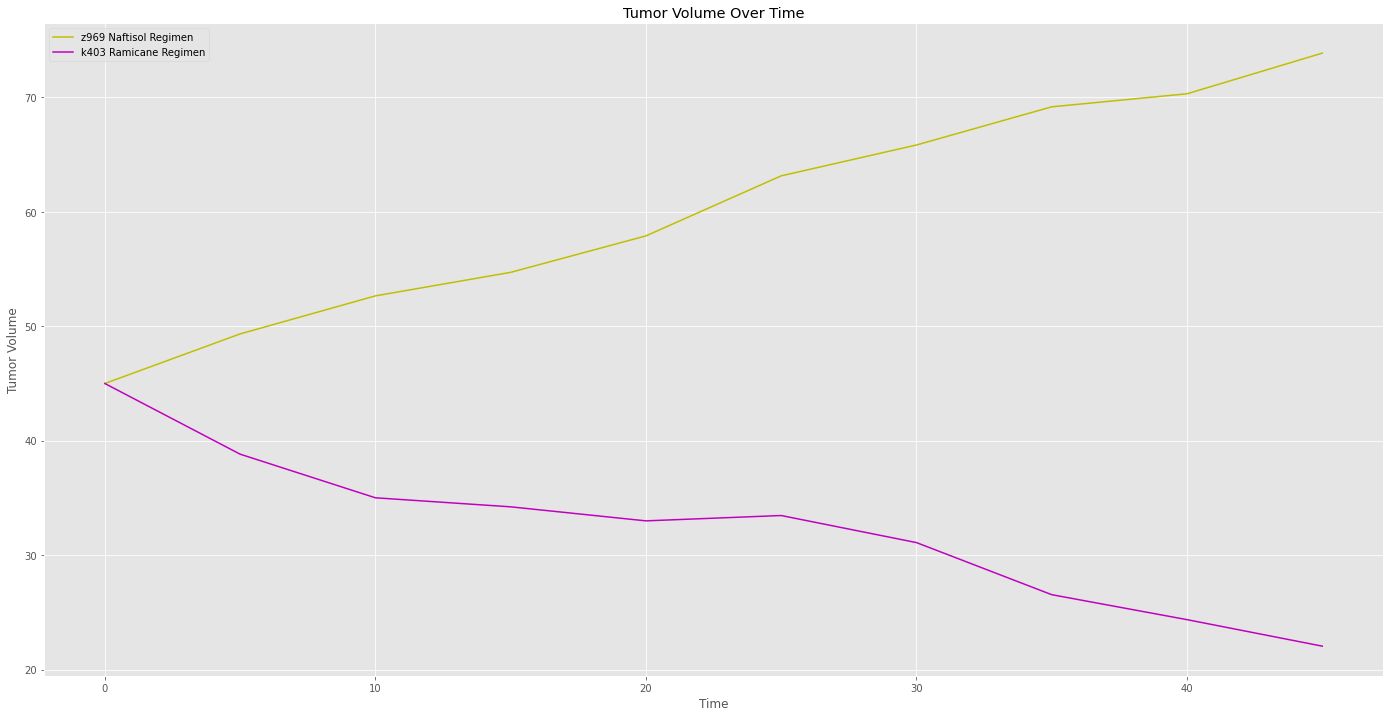

In [110]:
#plot intilizer
fig, (ax) = plt.subplots(1, figsize=(24, 12))
ax.plot(df.Timepoint, df['Tumor Volume (mm3)'], c='y')
ax.plot(df2.Timepoint, df2['Tumor Volume (mm3)'], c='m')
ax.set(title='Tumor Volume Over Time', xlabel='Time', ylabel='Tumor Volume')
ax.legend(['z969 Naftisol Regimen','k403 Ramicane Regimen'])
plt.show()

In [111]:
df_cap = clean_df.loc[clean_df.DrugRegimen == 'Capomulin']
df_cap

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites
10,1,s185,Capomulin,Female,3,17,[Name],D,Cauc,[Address],[ContactNumber],0,45.000000,0
11,1,s185,Capomulin,Female,3,17,[Name],D,Cauc,[Address],[ContactNumber],5,43.878496,0
12,1,s185,Capomulin,Female,3,17,[Name],D,Cauc,[Address],[ContactNumber],10,37.614948,0
13,1,s185,Capomulin,Female,3,17,[Name],D,Cauc,[Address],[ContactNumber],15,38.177232,0
14,1,s185,Capomulin,Female,3,17,[Name],D,Cauc,[Address],[ContactNumber],20,36.866876,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,45,i557,Capomulin,Female,1,24,[Name],D,AM,[Address],[ContactNumber],45,47.685963,1
1452,181,r157,Capomulin,Male,22,25,[Name],M,Latino,[Address],[ContactNumber],0,45.000000,0
1453,181,r157,Capomulin,Male,22,25,[Name],M,Latino,[Address],[ContactNumber],5,45.597064,0
1454,181,r157,Capomulin,Male,22,25,[Name],M,Latino,[Address],[ContactNumber],10,46.059608,0


In [112]:
#dataframe max timepoints
max_timepoints = clean_df[['DrugRegimen', 'Patient_ID', 'Timepoint']].groupby(['DrugRegimen', 'Patient_ID'], as_index=False).max()
max_timepoints

,DrugRegimen,Patient_ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
243,Zoniferol,q633,45
244,Zoniferol,s337,45
245,Zoniferol,w140,5
246,Zoniferol,w575,45


In [113]:
#merge in tumor volumes
max_df = pd.merge(clean_df, max_timepoints, on=['Patient_ID', 'Timepoint'], how='inner', suffixes=('', '_X'))
max_df

,row,Patient_ID,DrugRegimen,Sex,Age_months,Weight,Name,Marital Status,Ethnicity,Address,ContactNumbers,Timepoint,Tumor Volume (mm3),Metastatic Sites,DrugRegimen_X
0,0,k403,Ramicane,Male,21,16,[Name],D,Asian,[Address],[ContactNumber],45,22.050126,1,Ramicane
1,1,s185,Capomulin,Female,3,17,[Name],D,Cauc,[Address],[ContactNumber],45,23.343598,1,Capomulin
2,2,x401,Capomulin,Female,16,15,[Name],S,Cauc,[Address],[ContactNumber],45,28.484033,0,Capomulin
3,3,m601,Capomulin,Male,22,17,[Name],M,AM,[Address],[ContactNumber],45,28.430964,1,Capomulin
4,4,g791,Ramicane,Male,11,16,[Name],S,AM,[Address],[ContactNumber],45,29.128472,1,Ramicane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,z314,Stelasyn,Female,21,28,[Name],M,Cauc,[Address],[ContactNumber],5,45.934712,0,Stelasyn
244,245,z435,Propriva,Female,12,26,[Name],M,Cauc,[Address],[ContactNumber],10,48.710661,0,Propriva
245,246,z581,Infubinol,Female,24,25,[Name],M,AM,[Address],[ContactNumber],45,62.754451,3,Infubinol
246,247,z795,Naftisol,Female,13,29,[Name],S,Asian,[Address],[ContactNumber],45,65.741070,3,Naftisol


In [114]:
#list of drug regiment
drug_list = clean_df.DrugRegimen.unique()
drug_list

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [115]:
#tumor list
tumor_list = []
for drug in drug_list:
    tumor_vol = max_df.loc[max_df.DrugRegimen == drug]['Tumor Volume (mm3)']
    tumor_list.append(tumor_vol)

C:\Users\citiz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


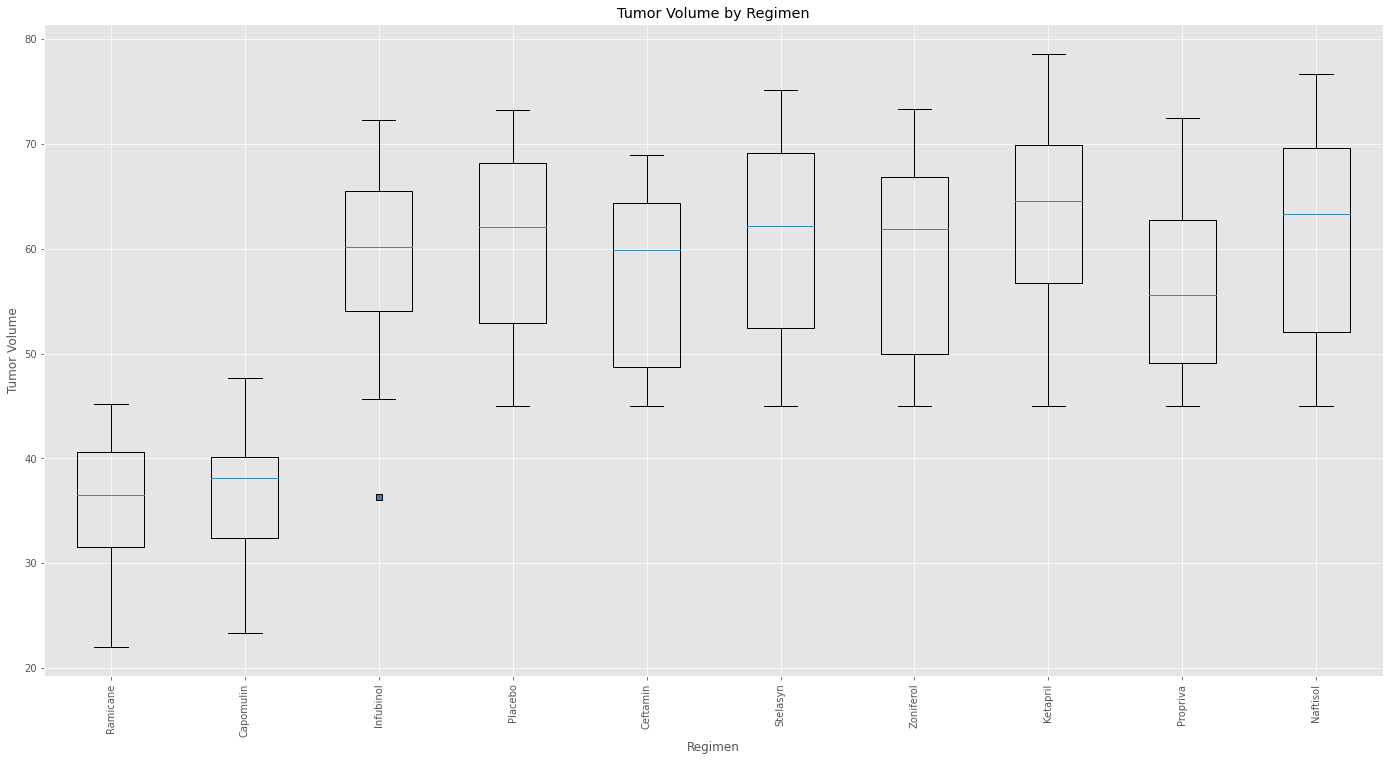

In [117]:
fig, (ax) = plt.subplots(1, figsize=(24, 12))
outlier = dict(markerfacecolor='steelblue', marker='s')
ax.boxplot((tumor_list), flierprops=outlier)
plt.title('Tumor Volume by Regimen')
plt.xlabel('Regimen')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], drug_list, rotation='vertical')
plt.ylabel('Tumor Volume')
plt.show()